In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /home/catpc/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [2]:
import pandas as pd
import os

csv_path = os.path.join(path, 'creditcard.csv')

In [3]:
df = pd.read_csv(csv_path)

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
#check imblance data
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<AxesSubplot: xlabel='Class'>

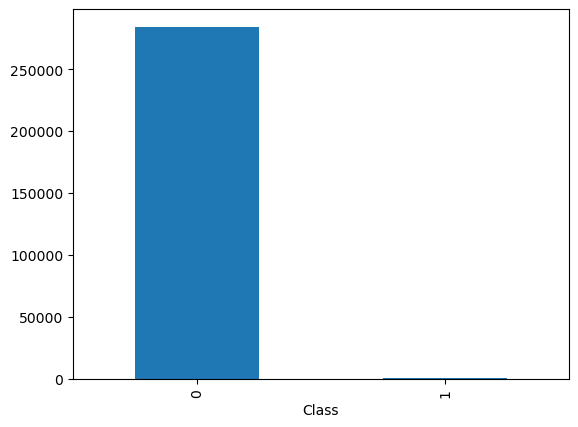

In [6]:
df['Class'].value_counts().plot(kind='bar')

In [7]:
df.shape


(284807, 31)

In [8]:
df = df.sample(n=20000)
df['Class'].value_counts()

Class
0    19961
1       39
Name: count, dtype: int64

# 1. Train model on imblance dataset



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



X = df.drop('Class', axis=1)
y = df['Class']


x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

# Predict on the test set
y_pred = rf_model.predict(x_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate accuracy
accuracy = rf_model.score(x_test, y_test)
print("Accuracy:", accuracy)

Confusion Matrix:
[[3992    0]
 [   2    6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4000
   macro avg       1.00      0.88      0.93      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy: 0.9995


# 2. Apply Sampling Techniques(RandomeOverSampler)


In [11]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

#Initialize RAndomOverSampler
ros = RandomOverSampler()

#perform Random Oversampling
x_ros,y_ros = ros.fit_resample(x_train,y_train)



In [12]:
y_ros.value_counts()

Class
0    15969
1    15969
Name: count, dtype: int64

In [13]:
#Initialize the model 
rf_model_ros = RandomForestClassifier()

#train the model on RAndom Oversampled data
rf_model_ros.fit(x_ros,y_ros)

#predict on the test set
y_pred_ros = rf_model_ros.predict(x_test)


#calculate confusion matrix
conf_matrix_ros = confusion_matrix(y_test, y_pred_ros)
print("Confusion Matrix (Random OverSampling): ")
print(conf_matrix_ros)
print(conf_matrix_ros)



#calculate classification report
class_report_ros = classification_report(y_test,y_pred_ros)
print("\nClassification Report (Random OverSampling): ")
print(class_report_ros)
accuracy_ros = rf_model_ros.score(x_test,y_test)
print(accuracy_ros)

Confusion Matrix (Random OverSampling): 
[[3992    0]
 [   2    6]]
[[3992    0]
 [   2    6]]

Classification Report (Random OverSampling): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4000
   macro avg       1.00      0.88      0.93      4000
weighted avg       1.00      1.00      1.00      4000

0.9995


# 3.Random Undersampling : (RandomeUnderSampler)

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

#Initialize RAndomOverSampler
rus = RandomUnderSampler()

#perform Random Oversampling
x_rus,y_rus = rus.fit_resample(x_train,y_train)


y_rus.value_counts()

Class
0    31
1    31
Name: count, dtype: int64

In [15]:
#Initialize the model 
rf_model_rus = RandomForestClassifier()

#train the model on RAndom Oversampled data
rf_model_rus.fit(x_rus,y_rus)

#predict on the test set
y_pred_rus = rf_model_rus.predict(x_test)


#calculate confusion matrix
conf_matrix_rus = confusion_matrix(y_test, y_pred_rus)
print("Confusion Matrix (Random OverSampling): ")
print(conf_matrix_rus)
print(conf_matrix_rus)



#calculate classification report
class_report_rus = classification_report(y_test,y_pred_rus)
print("\nClassification Report (Random OverSampling): ")
print(class_report_rus)
accuracy_rus = rf_model_rus.score(x_test,y_test)
print(accuracy_rus)

Confusion Matrix (Random OverSampling): 
[[3951   41]
 [   1    7]]
[[3951   41]
 [   1    7]]

Classification Report (Random OverSampling): 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3992
           1       0.15      0.88      0.25         8

    accuracy                           0.99      4000
   macro avg       0.57      0.93      0.62      4000
weighted avg       1.00      0.99      0.99      4000

0.9895


# SMOTE:

# Synthetic Minority Over-sampling Technique

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


#Initialize Smote
smote = SMOTE()

#perform Smote
x_smote, y_smote = smote.fit_resample(x_train,y_train)
y_smote.value_counts()


Class
0    15969
1    15969
Name: count, dtype: int64

In [19]:
#Initialize the model 
rf_model_smote = RandomForestClassifier()

#train the model on RAndom Oversampled data
rf_model_smote.fit(x_smote,y_smote)

#predict on the test set
y_pred_smote = rf_model_smote.predict(x_test)


#calculate confusion matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix (Random OverSampling): ")
print(conf_matrix_smote)
print(conf_matrix_smote)



#calculate classification report
class_report_smote = classification_report(y_test,y_pred_smote)
print("\nClassification Report (Random OverSampling): ")
print(class_report_smote)
accuracy_smote = rf_model_rus.score(x_test,y_test)
print(accuracy_smote)

Confusion Matrix (Random OverSampling): 
[[3992    0]
 [   2    6]]
[[3992    0]
 [   2    6]]

Classification Report (Random OverSampling): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4000
   macro avg       1.00      0.88      0.93      4000
weighted avg       1.00      1.00      1.00      4000

0.9895


# Precdiction

In [22]:
#get the input data as a 2d array 

inputs_1 = x_test.iloc[[10]].values

#predict with the model
prediction = rf_model_smote.predict(inputs_1)
print("Actual Class : ", y_test.iloc[10])
print("Predicted Class:", prediction[0])

Actual Class :  0
Predicted Class: 0


/home/catpc/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
#get the input data as a 2d array 

inputs_1 = x_test.iloc[[151]].values

#predict with the model
prediction = rf_model_smote.predict(inputs_1)
print("Actual Class : ", y_test.iloc[151])
print("Predicted Class:", prediction[0])

Actual Class :  0
Predicted Class: 0


/home/catpc/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
